In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import lccs_change

In [2]:
# da0 = xr.open_rasterio('bleh_0.tif')
# da1 = xr.open_rasterio('bleh_1.tif')
# outputfile =           'bleh_diff.tif'

# da0 = xr.open_rasterio('Forescue-2010.tif')
# da1 = xr.open_rasterio('Forescue-2015.tif')
# outputfile =           'Forescue-diff.tif'

# da0 = xr.open_rasterio('Snowy-2010.tif')
# da1 = xr.open_rasterio('Snowy-2015.tif')
# outputfile =           'Snowy-diff.tif'

# da0 = xr.open_rasterio('Gwydir-2010.tif')
# da1 = xr.open_rasterio('Gwydir-2015.tif')
# outputfile =           'Gwydir-diff.tif'

da0 = xr.open_rasterio('Leichhardt-2010.tif')
da1 = xr.open_rasterio('Leichhardt-2015.tif')
outputfile =           'Leichhardt-diff.tif'

In [3]:
# Drop "band" coord if present (thanks, rasterio)
if 'band' in da0.coords: da0 = da0.isel(band=0, drop=True)
if 'band' in da1.coords: da1 = da1.isel(band=0, drop=True)
    
# Examine unique values in the loaded data (debugging)
print("T0:",np.unique(da0.values))
print("T1:",np.unique(da1.values))

T0: [111. 112. 123. 124. 215. 216. 227. 228.]
T1: [111. 112. 123. 124. 215. 216. 227. 228.]


In [4]:
%%time
#foo = lccs_change.LCCS_ChangeDetect(da0, da1, showonly=['degradation'])
foo = lccs_change.LCCS_ChangeDetect(da0, da1)
print(foo)

<xarray.DataArray 'LCCS_ChangeDetect_Result' (y: 4000, x: 4000)>
array([[124112, 124112, 124112, ..., 228228, 228228, 228228],
       [124112, 228112, 124112, ..., 228228, 228228, 228228],
       [216112, 124112, 124112, ..., 228228, 228228, 228228],
       ...,
       [112112, 112112, 112112, ..., 112112, 112112, 112112],
       [112112, 112112, 112112, ..., 112112, 112112, 112112],
       [112112, 112112, 112112, ..., 112112, 112112, 112112]], dtype=int32)
Coordinates:
  * y        (y) float64 -1.9e+06 -1.9e+06 -1.9e+06 -1.9e+06 -1.9e+06 ...
  * x        (x) float64 8e+05 8.000e+05 8.001e+05 8.001e+05 8.001e+05 ...
Attributes:
    nodata:               -1
    crs:                  +init=epsg:3577
    transform:            (25.0, 0.0, 800012.5, 0.0, -25.0, -1900012.5, 0.0, ...
    class_labels:         {100: 'Vxx', 200: 'NVxx', 110: 'TVx', 120: 'AVx', 2...
    class_descriptions:   {100: 'L1: Primarily Vegetated', 200: 'L1: Primaril...
    change_labels:        {111111: 'CTV', 111112:

(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef8e689ef0>)

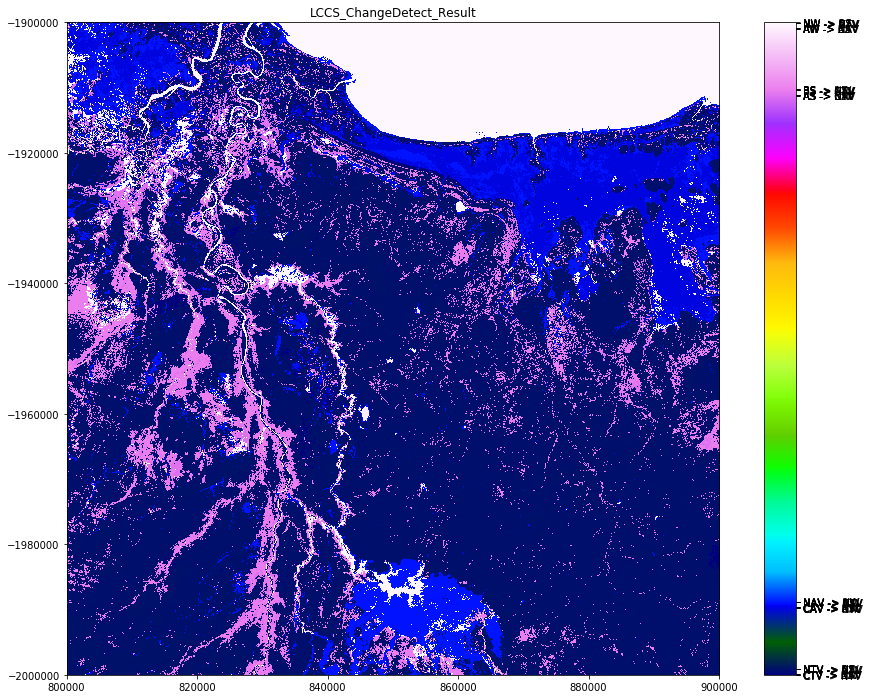

In [5]:
lccs_change.LCCS_Plot(foo)

In [6]:
foo.stats

,Value,Count,ChangeType,Label,Description,PctOfTotal,PctOfValid
8,112112,7281826,stable,NTV,stable,45.511412,45.511412
11,112215,1922451,degradation,NTV -> AS,urban expansion,12.015319,12.015319
56,228228,1661707,stable,NW,stable,10.385669,10.385669
12,112216,632635,degradation,NTV -> BS,vegetation loss,3.953969,3.953969
23,124112,551990,degradation,NAV -> NTV,wetland loss,3.449938,3.449938
16,123123,517389,stable,CAV,stable,3.233681,3.233681
38,216112,503453,improvement,BS -> NTV,vegetation establishment,3.146581,3.146581
42,216216,492064,stable,BS,stable,3.075400,3.075400
41,216215,374417,,BS -> AS,urban expansion,2.340106,2.340106
34,215215,354845,stable,AS,stable,2.217781,2.217781


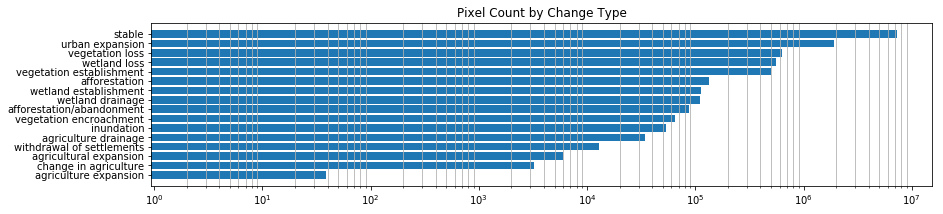

In [7]:
import matplotlib.pyplot as plt
#piedata = np.array(foo.stats.loc[foo.stats['PctOfValid'] >= 0.1][['Description','Count']]).T
piedata = np.array(foo.stats[['Description','Count']]).T
plt.figure(figsize=(14,3))
plt.grid(True, which='minor', axis='x')
plt.barh(piedata[0], piedata[1], log=True)
plt.gca().invert_yaxis()
plt.title('Pixel Count by Change Type')
plt.show()

In [ ]:
# TODO: Change matrix w/ counts (or pcts)

----

In [8]:
%%time
lccs_change.write_diff(foo, outputfile, debug=False)

CPU times: user 80 ms, sys: 152 ms, total: 232 ms
Wall time: 844 ms


In [9]:
%%bash -s "$outputfile"
# Check the output file
ls -lh $1
gdalinfo $1 

-rw-r--r-- 1 jovyan users 62M Feb 14 17:43 Leichhardt-diff.tif
Driver: GTiff/GeoTIFF
Files: Leichhardt-diff.tif
Size is 4000, 4000
Coordinate System is:
PROJCS["GDA94 / Australian Albers",
    GEOGCS["GDA94",
        DATUM["Geocentric_Datum_of_Australia_1994",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6283"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4283"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",-18],
    PARAMETER["standard_parallel_2",-36],
    PARAMETER["latitude_of_center",0],
    PARAMETER["longitude_of_center",132],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NOR

----